# TP : Les arbres de décision

#### AZIRI Abderrahmane
#### KHADIR Nadir

## Objectif du TP :



## Classification des données CAR :

On crée un chemin vers le fichier de données. 
Ensuite, on les lit de ce fichier en utilisant pd.read_csv().
Le DataFrame est alors créé avec toutes ses colonnes définies sur leurs features (buying=0, maint=1, doors=2, persons=3, lug_boot=4, safety = 5).
par la suite on analyse chaque colonne individuellement et on remplace toutes les données catégoriques par des données numériques choisises au préalable.

#### Question 1: (Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives)
On affiche le resumé de la description statistique de notre jeu de données pour mieux appréhender le dataset.

In [182]:
import pandas as pd
import numpy as np
path = r"/home/etudiant/Téléchargements/car.data"

data=pd.read_csv(path)
data=pd.DataFrame(data=data)
data.columns=['buying','maint','doors','persons','lug_boot','safety','class']


    

#### Question 2: Combien y a-t-il d’exemples de chaque classe ?

In [183]:
les_classes = np.unique(data['class'])

print ('On a {} classes dans notre dataset '.format(len(les_classes)))
print ('Nos classes :', les_classes)

On a 4 classes dans notre dataset 
Nos classes : ['acc' 'good' 'unacc' 'vgood']


##### Pour la suite, on va modifier nos données afin de pouvoir les utiliser pour l'apprentissage dans notre classifieur

On remplace chaque valeur de chaque colonne afin d'éviter toute ambiguïté par la suite.

Les donées seront stockées dans X et les labels dans y.

In [213]:

#pour la 1erre colonne
data['buying']=data['buying'].replace('low',0)
data['buying']=data['buying'].replace('med',1)
data['buying']=data['buying'].replace('high',2)
data['buying']=data['buying'].replace('vhigh',3)

data['maint']=data['maint'].replace('low',0)
data['maint']=data['maint'].replace('med',1)
data['maint']=data['maint'].replace('high',2)
data['maint']=data['maint'].replace('vhigh',3)

data['persons']=data['persons'].replace('more',5)
data['persons']=data['persons'].replace('2',2)
data['persons']=data['persons'].replace('4',4)

data['doors']=data['doors'].replace('5more',5)
data['doors']=data['doors'].replace('2',2)
data['doors']=data['doors'].replace('3',3)
data['doors']=data['doors'].replace('4',4)

data['lug_boot']=data['lug_boot'].replace('small',1)
data['lug_boot']=data['lug_boot'].replace('med',2)
data['lug_boot']=data['lug_boot'].replace('big',3)

data['safety']=data['safety'].replace('low',1)
data['safety']=data['safety'].replace('med',2)
data['safety']=data['safety'].replace('high',3)


data['class']=data['class'].replace('acc',0)
data['class']=data['class'].replace('good',1)
data['class']=data['class'].replace('unacc',2)
data['class']=data['class'].replace('vgood',3)

#labels=np.unique(data['class'])
y=data['class']
X = data[['buying','maint','doors','persons','lug_boot','safety']]
print(data.dtypes)
print('\n',data.describe())


buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

             buying        maint        doors      persons     lug_boot  \
count  1727.000000  1727.000000  1727.000000  1727.000000  1727.000000   
mean      1.499131     1.499131     3.500869     3.667632     2.000579   
std       1.118098     1.118098     1.118098     1.247296     0.816615   
min       0.000000     0.000000     2.000000     2.000000     1.000000   
25%       0.500000     0.500000     3.000000     2.000000     1.000000   
50%       1.000000     1.000000     4.000000     4.000000     2.000000   
75%       2.000000     2.000000     4.500000     5.000000     3.000000   
max       3.000000     3.000000     5.000000     5.000000     3.000000   

            safety        class  
count  1727.000000  1727.000000  
mean      2.000579     1.552982  
std       0.816615     0.876136  
min       1.000000     0.000000  
25%       1.000000   

En affichant la description on remarque que les types de variables dans le dataset sont tous numériques.


##### L'étape suivante consiste en un split de nos données afin de faire notre apprentissage et ensuite de tester notre modèle.

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

* On affiche la représentation de notre arbre de décision : 

[Text(0.25, 0.9, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1208\nvalue = [268, 48, 851, 41]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 402\nvalue = [0, 0, 402, 0]'),
 Text(0.375, 0.7, 'X[3] <= 3.0\ngini = 0.573\nsamples = 806\nvalue = [268, 48, 449, 41]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 265\nvalue = [0, 0, 265, 0]'),
 Text(0.5, 0.5, 'X[0] <= 1.5\ngini = 0.625\nsamples = 541\nvalue = [268, 48, 184, 41]'),
 Text(0.25, 0.3, 'X[1] <= 1.5\ngini = 0.65\nsamples = 264\nvalue = [138, 48, 37, 41]'),
 Text(0.125, 0.1, 'gini = 0.694\nsamples = 130\nvalue = [43, 48, 8, 31]'),
 Text(0.375, 0.1, 'gini = 0.445\nsamples = 134\nvalue = [95, 0, 29, 10]'),
 Text(0.75, 0.3, 'X[1] <= 1.5\ngini = 0.498\nsamples = 277\nvalue = [130, 0, 147, 0]'),
 Text(0.625, 0.1, 'gini = 0.382\nsamples = 140\nvalue = [104, 0, 36, 0]'),
 Text(0.875, 0.1, 'gini = 0.308\nsamples = 137\nvalue = [26, 0, 111, 0]')]

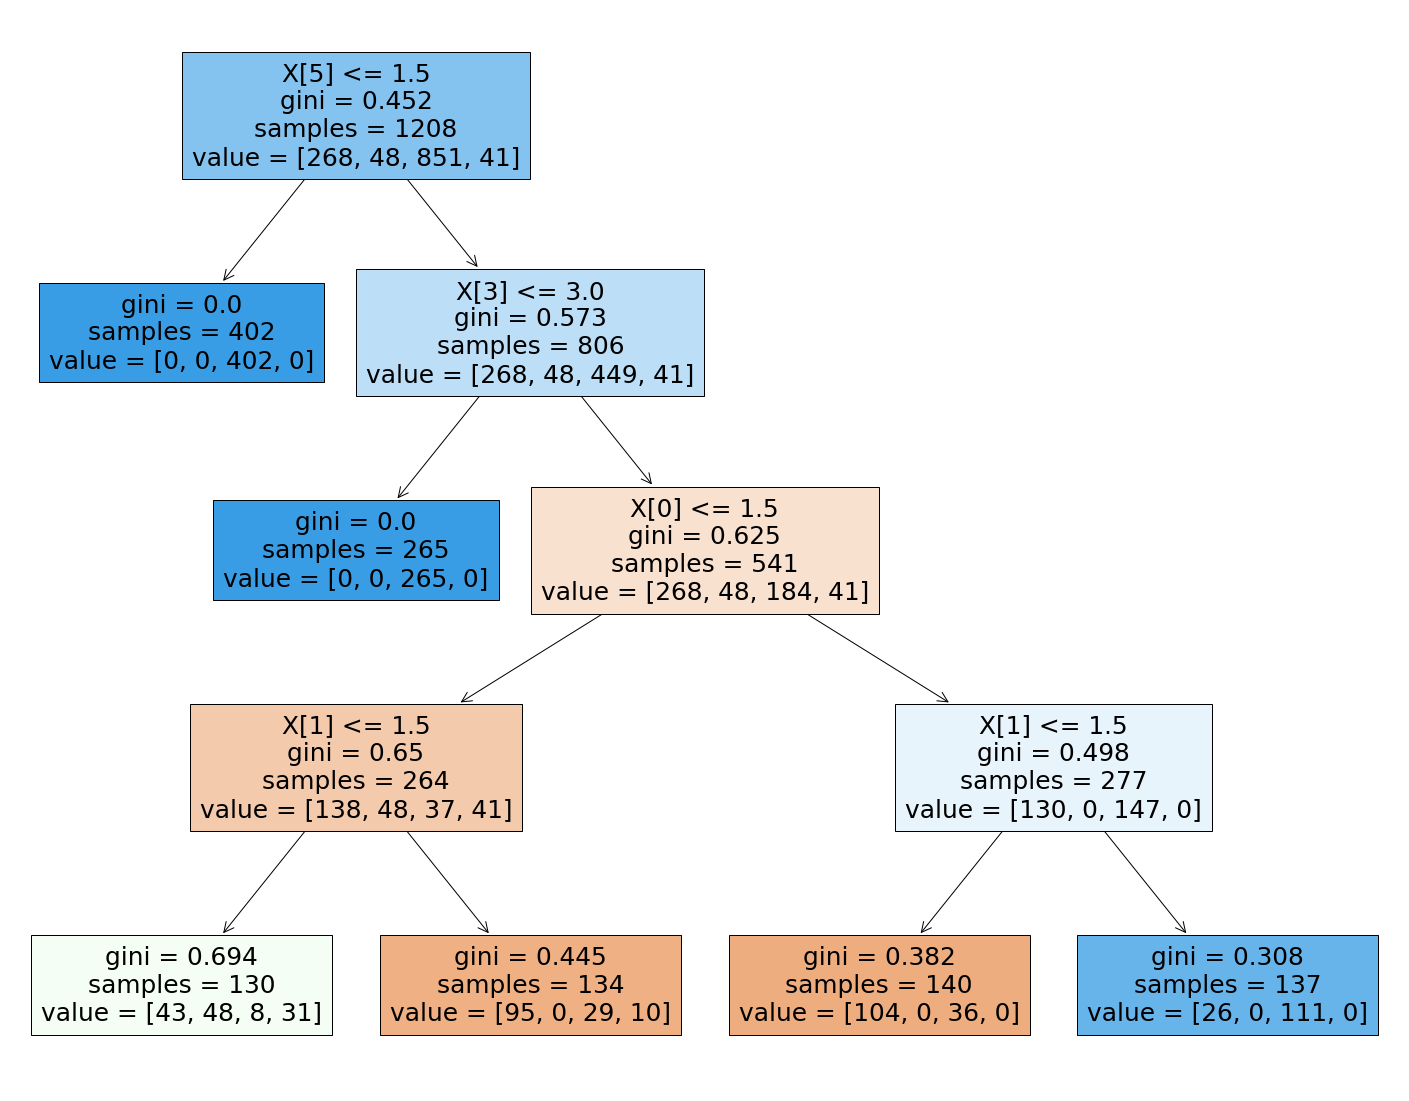

In [191]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)


Ensuite on applique notre modèle entrainé sur les données de test: 

In [169]:
clf.predict(X_test)
clf.score(X_test,y_test)

0.9807321772639692

In [195]:
from sklearn.model_selection import GridSearchCV



tree_param = [{'criterion': ['entropy', 'gini'],
               'max_depth': range(1,200,5),
              'min_samples_leaf': range(1,50,2)}]



classifier = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=5)
classifier.fit(X_train, y_train)
print(classifier.best_params_)

classifier.predict(X_test)
classifier.score(X_test,y_test)

{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1}


0.9807321772639692

#### Question 3 : Changez les valeurs de paramétres max_depth et min_samples_leaf. Que constatez- vous ?

max_depth :

La profondeur maximale théorique qu'un arbre de décision peut atteindre est inférieure d'une unité au nombre d'échantillons d'apprentissage, mais aucun algorithme ne vous laissera atteindre ce point pour des raisons évidentes, l'une des principales étant l'Overfiting.

En général, plus notre arbre est profond, plus notre modèle devient complexe, car il comporte plus de divisions et capture plus d'informations sur les données. C'est l'une des causes principales de l'aOverfitting des arbres décisionnels, car notre modèle s'adaptera parfaitement aux données d'apprentissage et ne sera pas en mesure de généraliser correctement sur l'ensemble de test. Donc, si notre modèle s'adapte trop, réduire le nombre de max_depth est une façon de combattre l'adaptation excessive.

Il est également mauvais d'avoir une profondeur très faible parce que notre modèle va sous-adapter la manière de trouver la meilleure valeur, il n'y a pas une valeur unique pour toutes les solutions. Donc, ce qu'on a fais , c'est de laisser le modèle décider de la profondeur maximale d'abord et ensuite, en comparant nos résultats de train et de test, on regarde s'il y a sur- ou sous-adaptation et, selon le degré, on diminue ou augmente la profondeur maximale.


min_samples_leaf:

min_samples_leaf est le nombre minimum d'échantillons requis pour être à un noeud leaf. Ce paramètre est similaire à min_samples_splits, cependant, il décrit le nombre minimum d'échantillons des échantillons aux leaf, la base de l'arbre.

Des valeurs plus élevées empêchent un modèle d'apprendre des relations qui pourraient être très spécifiques à l'échantillon particulier sélectionné pour un arbre. Des valeurs trop élevées peuvent également conduire à un sous-ajustement, c'est pourquoi nous avons ajuster les valeurs de min_samples_split en fonction du niveau de sous-ajustement ou de surajustement. L'augmentation de cette valeur peut entraîner un sous-ajustement.


#### Question : 
#### Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test. 
#### Calculez le taux d’éléments mal classifiés sur l’ensemble de test. 
#### Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.

In [205]:

# une division apprentissage/test avec 5% des données en apprentissage et 95% test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05,
random_state=1)



# Grid search sur les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.

tree_param = [{'max_depth': range(1,200,5),
              'min_samples_leaf': range(1,50,2)}]

classifier = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=5)
classifier.fit(X_train, y_train)
print(classifier.best_params_)

classifier.predict(X_test)
score = classifier.score(X_test,y_test)



# Calcule du taux d’éléments mal classifiés sur l’ensemble de test. 
print ('Le taux d\'éléments mal classifiées est : ', 1-score)

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 71, 'min_samples_leaf': 1}
Le taux d'éléments mal classifiées est :  0.17672151127361369


## Affichage de la surface de décision

#### Question :
#### Refaire l’affichage pour les autres paires d’attributs. Sur quelle paire la séparation entre les classes est la plus marquée ?

On met en place une méthode pour pouvoir faire une combinaison de chaque deux features distinctes

#### On remarque que dans notre cas la surface de decision ne sert pas à grand chose 


5 4


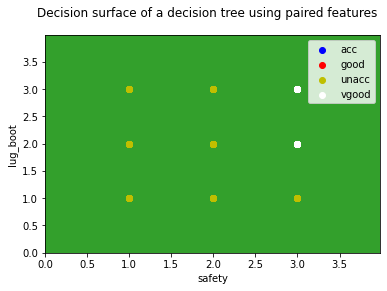

5 3


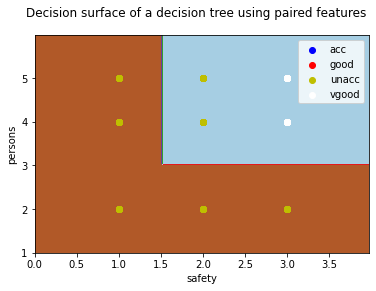

5 2


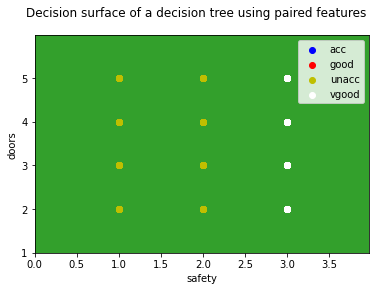

5 1


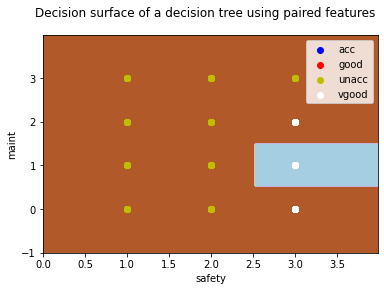

5 0


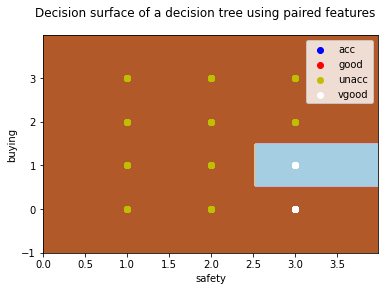

4 3


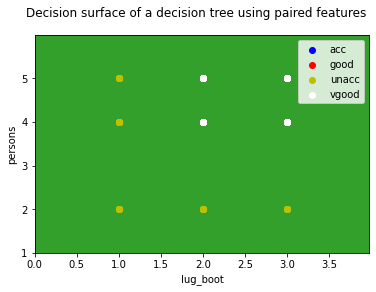

4 2


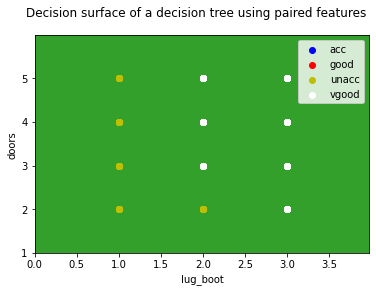

4 1


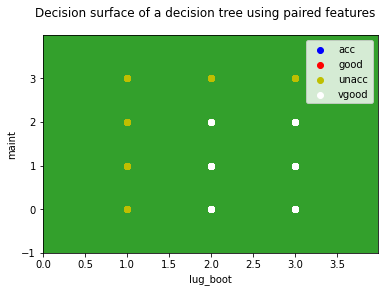

4 0


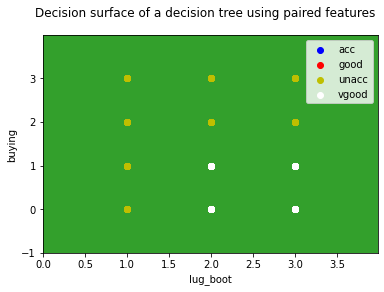

3 2


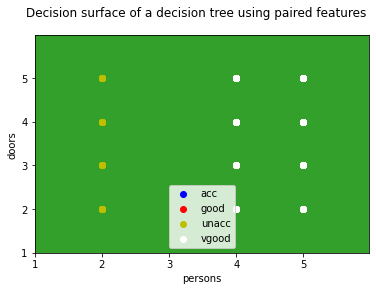

3 1


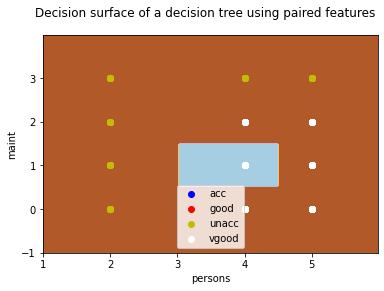

3 0


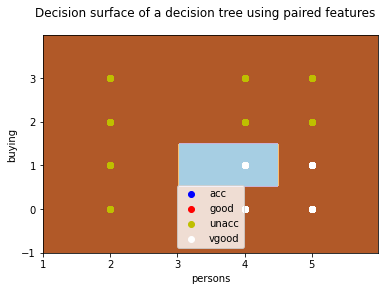

2 1


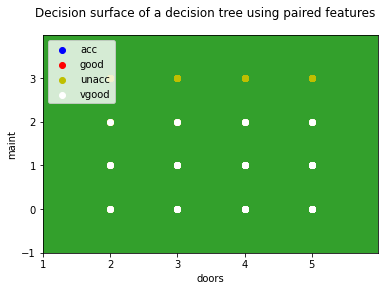

2 0


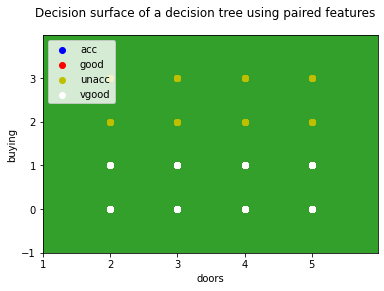

1 0


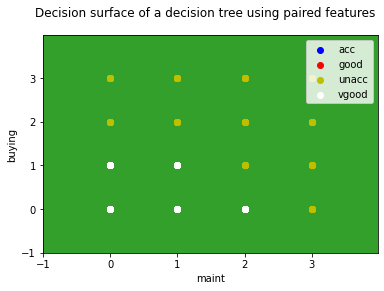

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_classes = 4
plot_colors = "bryw" # blue-red-yellow
plot_step = 0.02

f = 5


while f>0: 
    j = f 
    while j>0 :
        j = j-1

        pair= [f, j]
        print(f,j)
        Xr= np.array(X)
        Xr = Xr[:,pair]

        # Apprentissage de l'arbre
        clf = tree.DecisionTreeClassifier().fit(Xr, y)
        # Affichage de la surface de décision
        x_min, x_max = Xr[:, 0].min() - 1, Xr[:, 0].max() + 1
        y_min, y_max = Xr[:, 1].min() - 1, Xr[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,y_max, plot_step))

        classe = ['acc', 'good', 'unacc','vgood']

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.xlabel(data.columns[pair[0]])
        plt.ylabel(data.columns[pair[1]])
        plt.axis("tight")
        # Affichage des points d'apprentissage
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(Xr[idx, 0], Xr[idx, 1], c=color, label=classe[i],cmap=plt.cm.Paired)
        plt.axis("tight")
        plt.suptitle("Decision surface of a decision tree using paired features")
        plt.legend()
        plt.show()
        
    f = f-1